# Customer Churn Analysis and Prediction - by Sakshi srivastava

# TASK 1 Data Preparation
**Description:** In this task, you will be responsible for loading the dataset and conducting an initial exploration. Handle missing values, and if necessary, convert categorical variables into numerical representations. Furthermore, split the dataset into training and testing sets for subsequent model evaluation.<BR>
**Skills:** 
* Data loading, data exploration,
* Handling missing values, 
* Data preprocessing, 
* Categorical variable encoding, 
* Dataset splitting.


**Project Overview:The project aims to analyze customer churn in atelecommunications company and develop predictive models to identify at-risk customers.
The ultimate goal is to provide actionable insights and recommendations to reduce churn and improve customer retention.**

**Importing libraries**

In [376]:
import pandas as pd
import numpy as numpy


**Loading Dataset**

In [378]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\saiket system\Telco_Customer_Churn_Dataset  (3).csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Data Exploration**

In [380]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [381]:
df.tail(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [382]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2325,3097-PYWXL,Female,0,Yes,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.95,82.9,No
4724,5073-RZGBK,Female,0,Yes,Yes,50,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),80.05,4042.2,No
5005,2359-QWQUL,Female,0,Yes,No,39,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.70,4134.85,Yes


In [383]:
df.shape

(7043, 21)

THERE ARE 7043 ROWS AND 21 COLUMNS

In [385]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<code>Datatypes No of columns
float64       1 
int64         2
object        18</code>

**Handle Missing Values**

In [389]:
#no need customer ID in our analysis as it does not help us predict whether the cutomer will churn or not and it increases the dimensionality.

df.drop(["customerID"], inplace = True, axis = 1)

In [390]:
#total charges must be int or float 

In [391]:
df["TotalCharges"].nunique()

6531

In [392]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [393]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [394]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

NO NULL VALUES

In [396]:
df.duplicated().sum()

22

NO DUPLICATES

In [398]:
for i in df.columns:
    print(df[i].value_counts(), sep=" \n  ")

gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No

In [399]:
for i in df.columns:
    print(df[i].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


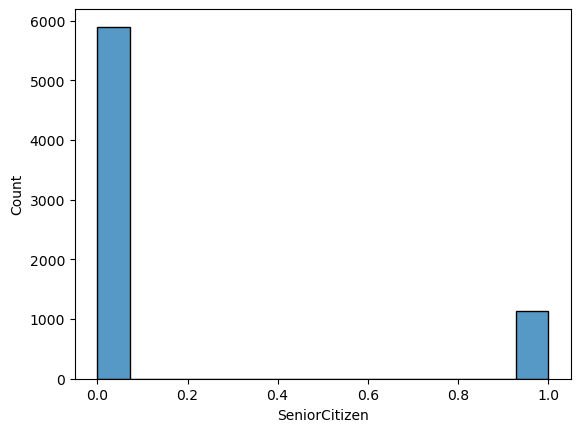

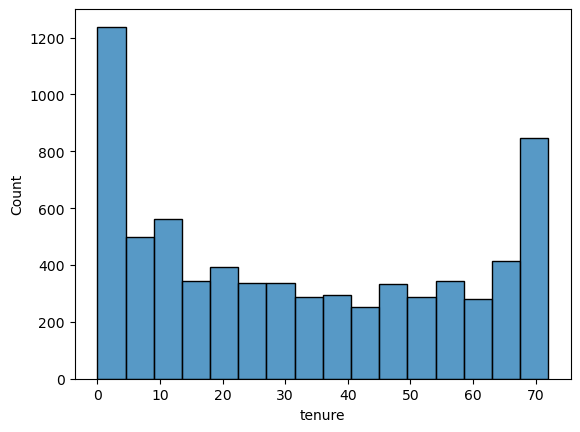

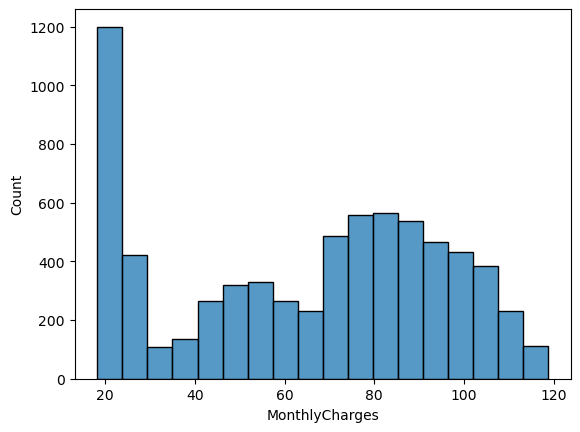

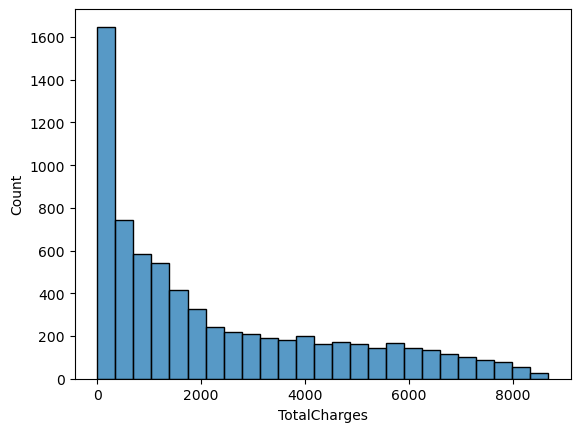

In [400]:

# Visualize distributions for key variables (optional)
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualizing a column (e.g., 'Age' or 'Churn')
for i in df.columns:
    if df[i].dtypes!="object":
      sns.histplot(df[i])
      plt.show()

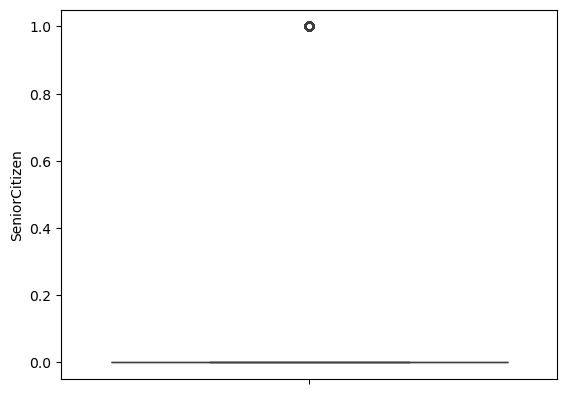

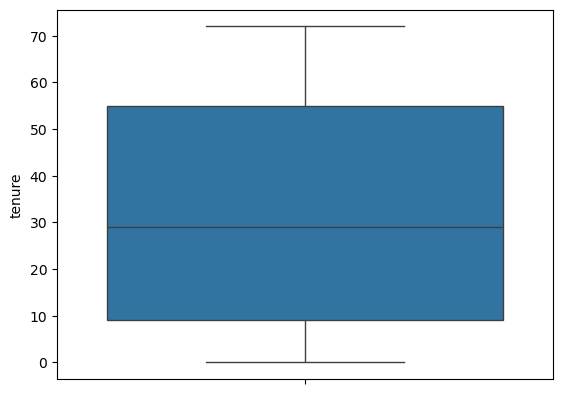

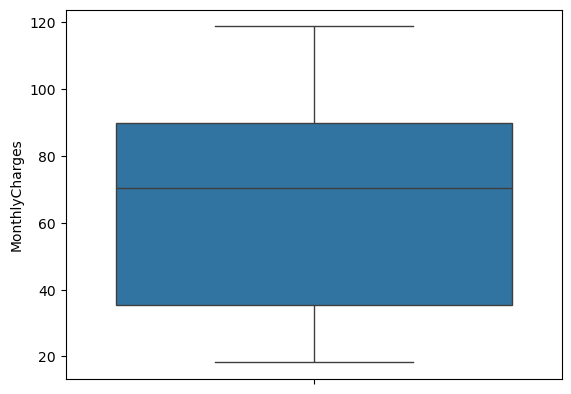

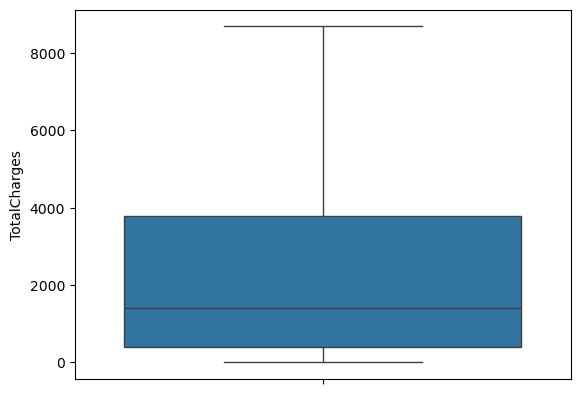

In [401]:
# Boxplot for visual check
import seaborn as sns
for i in df.columns:
    if df[i].dtypes!="object":
      sns.boxplot(df[i])
      plt.show()  



NO OUTLIER

**Encoding -Convert Categorical to Numerical**

In [404]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = le.fit_transform(df[i])


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [406]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Dataset splitting**

In [408]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 2: Exploratory Data Analysis (EDA)
**Description:** Calculate and visually represent the overall churn rate. Explore customer distribution by gender, partner status, and dependent status.
Analyze tenure distribution and its relation with churn. Investigate how churn varies across different contract types and payment methods<br>
**Skills:** 
* Data visualization, statistical analysis
* Exploratory data analysis
* Understanding of customer demographic variables
* Churn rate calculation.


**1. Overall Churn Rate**

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


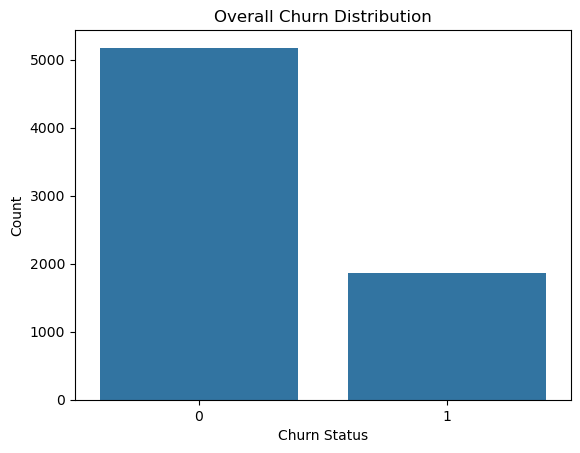

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)
sns.countplot(x='Churn', data=df)
plt.title('Overall Churn Distribution')
plt.ylabel('Count')
plt.xlabel('Churn Status')
plt.show()


*In this prediction,target is whether customer will churn or not.The proportion of churn status is imbalance. There is an unequal distribution between Churn 0 Yes and Churn 1. 
A majority of the churn data are labeled No while this case places more importance on predicting the Yes.*

**2. Customer Distribution by Gender, Partner, and Dependent**

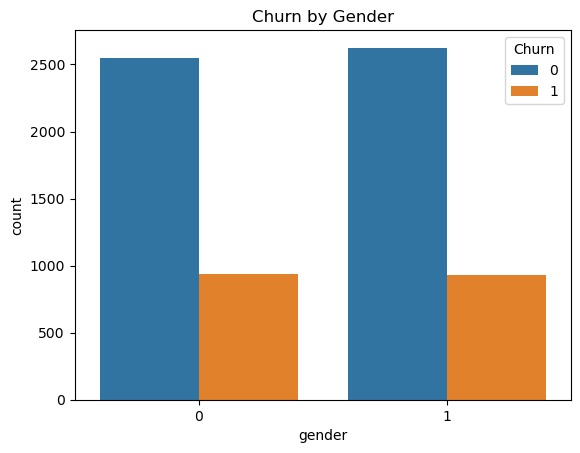

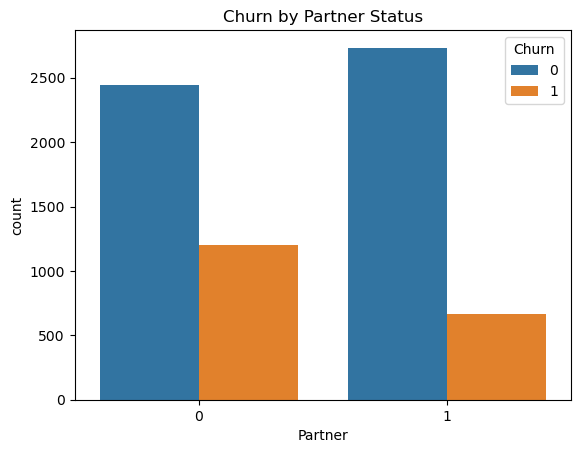

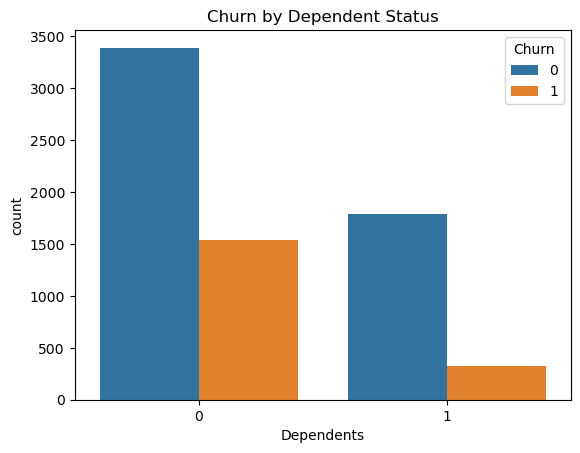

In [414]:
# Gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()
# Partner
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title('Churn by Partner Status')
plt.show()
# Dependents
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Churn by Dependent Status')
plt.show()


In [415]:
categorical_cols = [  # List columns of categorical data type
    'gender','Dependents',
    'Partner']
for col in categorical_cols:
    freq = df[col].value_counts(normalize=True).reset_index()
    freq.columns = [f'{col}', 'Proportion']
    print('-'*40+'\n', freq)

----------------------------------------
    gender  Proportion
0       1    0.504756
1       0    0.495244
----------------------------------------
    Dependents  Proportion
0           0    0.700412
1           1    0.299588
----------------------------------------
    Partner  Proportion
0        0    0.516967
1        1    0.483033


*There is an almost equal proportion of female (49.5%) and male (50.5%) customers. 
Both genders have similar churn rate at 26%, signifying that gender has little to no effect on leaving the telco service.*

*Customers without partners tend to churn more.It indicates that single customers might be less loyal or more price-sensitive.*

*Customers without dependents show higher churn rates. Suggests customers with families are more stable and possibly more engaged.*



**3. Tenure Distribution and Relation with Churn**

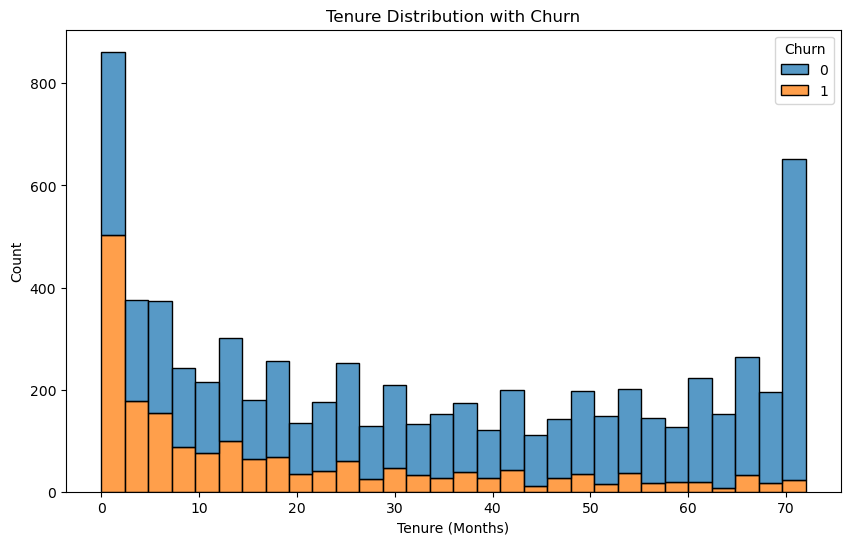

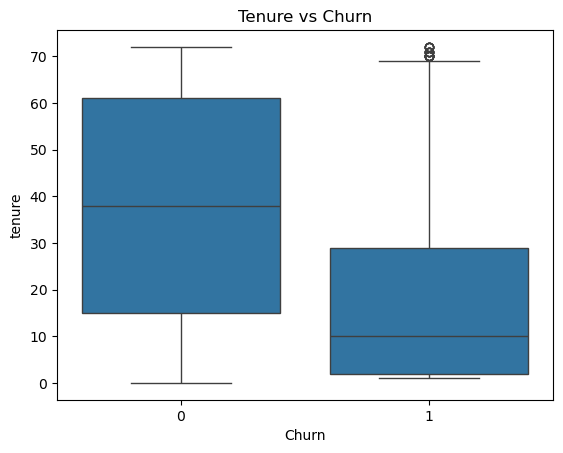

In [420]:
# Tenure Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution with Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()
# Boxplot for more insight
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()


*We see that new customers (i.e., tenure under 12 months) have the highest cases of churn. On the other hand, it is observed that longer tenures translate into lower proportions of churn, especially in the case of very loyal customers (i.e., tenure over 60 months)
Customers with lower tenure (0–12 months) churn significantly more.* <br>
*Churn decreases as tenure increases — long-tenured customers are more loyal.Indicates a critical need to engage new users in their first year.*



**4. Churn by Contract Type**

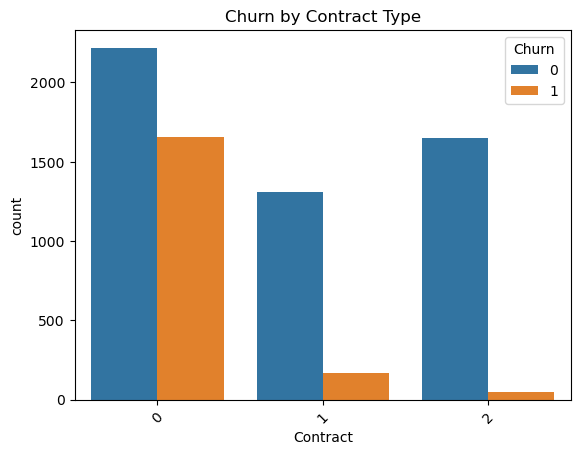

In [423]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)
plt.show()


*Month-to-month contract users have the highest churn rate.
One-year and two-year contracts show much lower churn.
Long-term contracts build customer stickiness — a strategic upselling opportunity.*



**5. Churn by Payment Method**

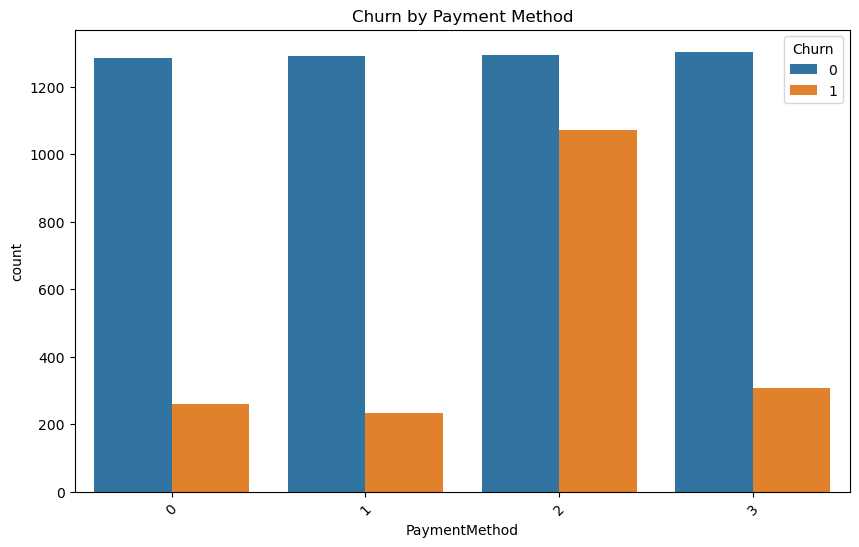

In [426]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()


*Electronic check users churn the most — possibly due to perceived cost or lack of convenience.
Customers using automatic payments (credit cards, bank transfers) are more loyal.*



**Recommendations**
* Offer incentives for longer contract signups.
* Consider targeting single users or those without dependents with tailored retention offers.
* Provide special onboarding for new customers (<12 months).
* Promote auto-pay options for added convenience.


# Task 3: Customer Segmentation
 **Description:** 
Segment customers based on tenure, monthly charges, and contract type. Analyze churn rates within these segments. Identify high-value customers who are at risk of
churning and might need special attention.<br>
 Skills :<br>
 * Segmentation techniques
 * Understanding of customer behavior
 * Churn analysis within segments
 * Identifying high-value customers.


In [430]:
#1. Select Key Features for Segmentation
segdf = df[['tenure', 'MonthlyCharges', 'Contract', 'Churn']]

In [431]:
#2. Encode Categorical Variables (Contract Type)
segdf = pd.get_dummies(segdf, columns=['Contract'], drop_first=True)

In [432]:
#3. Standardize Features
from sklearn.preprocessing import StandardScaler
features = ['tenure', 'MonthlyCharges'] + [col for col in segdf.columns if 'Contract_' in col]
X = segdf[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [433]:
#4. Apply Clustering -: K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
segdf['Segment'] = kmeans.fit_predict(X_scaled)

In [434]:
#5. Analyze Churn Rate Within Segments
churn_by_segment = segdf.groupby('Segment')['Churn'].value_counts(normalize=True).unstack()
print(churn_by_segment)

Churn           0         1
Segment                    
0        0.971014  0.028986
1        0.502864  0.497136
2        0.887305  0.112695
3        0.700680  0.299320


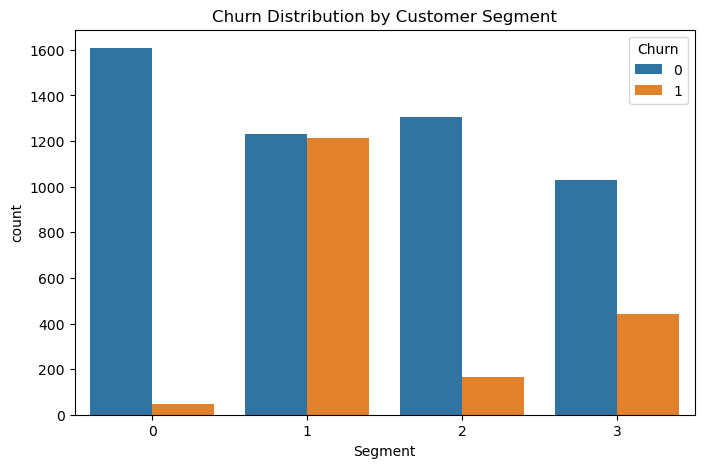

In [435]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Segment', hue='Churn', data=seg_df)
plt.title('Churn Distribution by Customer Segment')
plt.show()

Short-tenure, low-paying customers churn the most.
<br>
Long-tenure, high-paying customers are the most loyal.
<br>
High-paying, month-to-month users have high churn risk.
<br>
Contract type strongly influences churn behavior.
<br>
High-value churners should be prioritized for retention.
<br>
Segment-based targeting improves churn management strategies.
<br>
Early engagement is key to reducing new user churn.
<br>
Auto-payment users are more likely to stay.



# Task 4: Churn Prediction Model
 **Description:**
 Choose suitable machine learning algorithms (e.g., logistic regression, decision trees) for churn prediction. Split data into training and
 testing sets, train and evaluate multiple models using metrics like accuracy, precision,recall, and F1-score. Perform feature selection and hyperparameter tuning for optimal
 performance.<br>
 Skills :
* Machine learning algorithms
* Model training and evaluation,
* Feature selection, hyperparameter tuning
* Understanding of classification metrics.


In [438]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [439]:
from sklearn.model_selection import train_test_split
X = df.drop(['Churn'], axis=1)
y = df['Churn'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [440]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(classification_report(y_test, y_pred))



Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409


Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1035
           1       0.47      0.51      0.49       374

    accuracy                           0.72      1409
   macro avg       0.64      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409


Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78

In [441]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Top features:", selected_features.tolist())


Top features: ['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'MonthlyCharges', 'TotalCharges']


In [442]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring='f1', cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best F1 score:", grid.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 score: 0.5729465296398747


* Logistic Regression gave the best balance with 80% accuracy and decent churn detection (F1 = 0.59).

* Decision Tree underperformed on churners (F1 = 0.51) and may be overfitting.

* Random Forest had high accuracy (79%) but low recall (0.50) for churners.

#  Task 5: Model Evaluation and Interpretation
 **Description:**
 Evaluate the best predictive model using the testing dataset. Interpret model coefficients or feature importances to comprehend factors influencing churn. Create ROC curves and calculate 
AUC for model performance assessment.<br>
 **Skills :**
* Model evaluation
* Interpreting coefficients/features importance
* ROC curve analysis
* AUC calculation
* Understanding of model performance metrics.


In [445]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Train the logistic regression model
logreg = LogisticRegression(max_iter=4000)
logreg.fit(X_train, y_train)
# Predict probabilities
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
y_pred = logreg.predict(X_test)
# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



AUC Score: 0.84


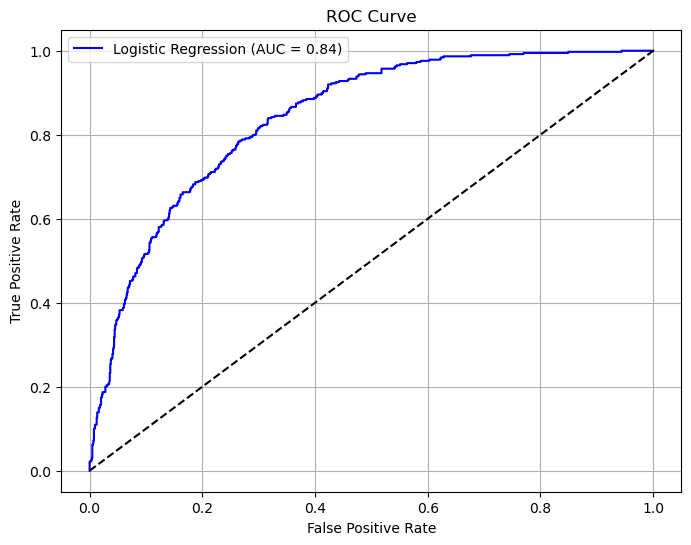

In [446]:
# AUC Score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.2f}")
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

             Feature  Coefficient  Abs_Coeff
5       PhoneService    -0.958227   0.958227
14          Contract    -0.718736   0.718736
15  PaperlessBilling     0.395219   0.395219
8     OnlineSecurity    -0.286758   0.286758
11       TechSupport    -0.264865   0.264865
7    InternetService     0.234526   0.234526
3         Dependents    -0.233095   0.233095
1      SeniorCitizen     0.171918   0.171918
9       OnlineBackup    -0.150145   0.150145
6      MultipleLines     0.092674   0.092674
16     PaymentMethod     0.087794   0.087794
10  DeviceProtection    -0.085959   0.085959
4             tenure    -0.051484   0.051484
2            Partner     0.037096   0.037096
17    MonthlyCharges     0.024099   0.024099
0             gender     0.015612   0.015612
12       StreamingTV     0.005982   0.005982
13   StreamingMovies     0.003092   0.003092
18      TotalCharges     0.000232   0.000232


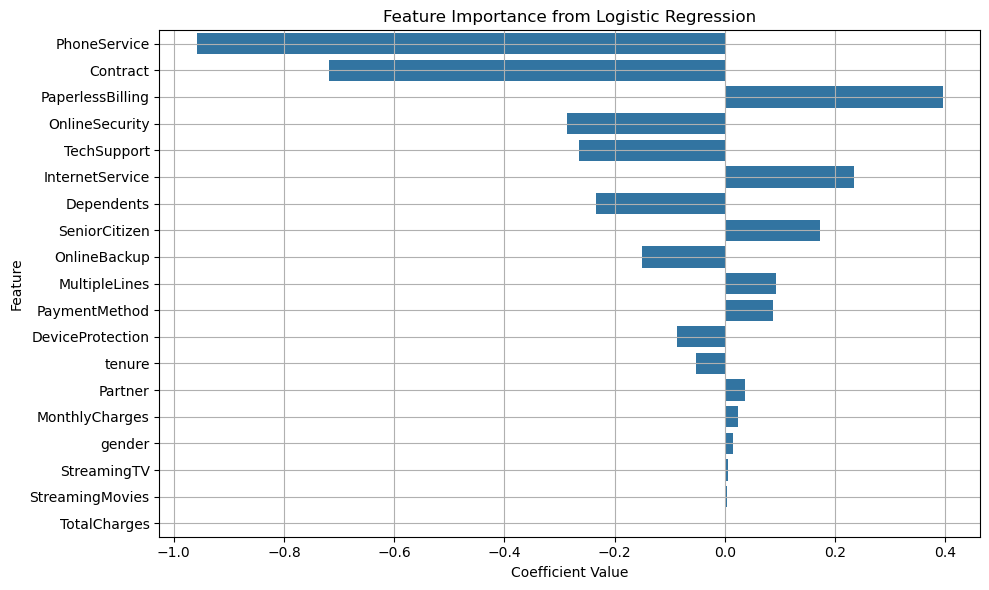

In [447]:
# Feature importance (coefficients)
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0]
})
coeff_df['Abs_Coeff'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Abs_Coeff', ascending=False)
print(coeff_df)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()


# Task 6: Business Recommendations
**Description:** Based on the analysis and predictive models, provide actionable recommendations to the business. Suggest specific marketing strategies, retention offers, 
or customer engagement tactics. Estimate the potential impact of these recommendations on revenue and churn rate.<br>
**Skills: -**
* Business acumen
* Data-driven decision-making
* Strategic thinking
* Impact estimation
* Communication skills

**Target High-Risk Customers:**
Focus on customers who are on month-to-month contracts, have high monthly charges, and are relatively new (low tenure). These users are the most likely to churn and need attention first.
<br>
**Retention Offers:**
Encourage long-term commitment by offering discounts on annual or semi-annual plans. Loyalty perks or limited-time offers can also be effective in keeping customers around.<br>
**Customer Engagement:**
Send personalized emails to at-risk customers highlighting their benefits and usage.
Consider launching a "Save the Customer" initiative — where customer service teams reach out directly before churn happens.<br>
**Product Bundling:**
Increase value by offering bundled packages (e.g., internet + phone + TV) at a discounted rate. 
Bundles create a sense of value and make it harder for customers to leave.<br>
**Estimated Impact:**
By reducing churn by just 5% in this high-risk group, the business could see a 2–4% increase in overall revenue,
thanks to improved customer lifetime value.

* Enhance the onboarding experience for new users with tutorials, welcome offers, and proactive check-ins during the first few months — tenure is a key churn driver.
<br>
* Implement regular surveys or feedback forms to understand customer pain points. Act on this data to improve service and satisfaction.
<br>
* Use predictive analytics to identify customers who are likely to benefit from upgraded plans — offer them targeted upsell options with clear value.
<br>
* Develop a real-time dashboard for customer support teams to flag high-churn-risk accounts, so they can act before the customer decides to leave.
<br>
* Poor service quality often leads to churn. Monitor metrics like downtime, complaint frequency, and support resolution time to identify and fix friction points.
<br>
* Celebrate loyalty! Offer small rewards (e.g., a free month or a premium add-on) at 6, 12, and 24-month milestones to build emotional connection and reduce churn.
<br>
* Create a customer community (forums, events, webinars) to increase brand engagement and give users a sense of belonging.
<br>
* Deploy AI chatbots that offer instant solutions, especially for frequently asked billing or technical queries — faster resolution = happier customers.